# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     672.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           5.56e-38
Time:                        18:02:14   Log-Likelihood:                -6.8963
No. Observations:                  50   AIC:                             21.79
Df Residuals:                      46   BIC:                             29.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0258      0.099     50.920      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50684232  4.96385208  5.38610298  5.75032747  6.04165514  6.25605588
  6.40100201  6.49424063  6.56087779  6.62925365  6.72628625  6.87304901
  7.08130836  7.35159059  7.67309536  8.02547018  8.38215426  8.71474239
  8.99765178  9.21232533  9.35028041  9.41450263  9.41895521  9.38628496
  9.34410141  9.32044066  9.33915913  9.41601403  9.55607447  9.75288863
  9.98954379 10.24144501 10.48035605 10.67903847 10.81572685 10.87770476
 10.86339408 10.78261424 10.65496891 10.50662522 10.36601453 10.25916125
 10.20540712 10.21423338 10.28370308 10.40077928 10.54346696 10.68442682
 10.79546696 10.85217478]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.82409198 10.68143235 10.44093864 10.14076547  9.83113776  9.56205388
  9.37104435  9.27398302  9.26120063  9.29985216]


## Plot comparison

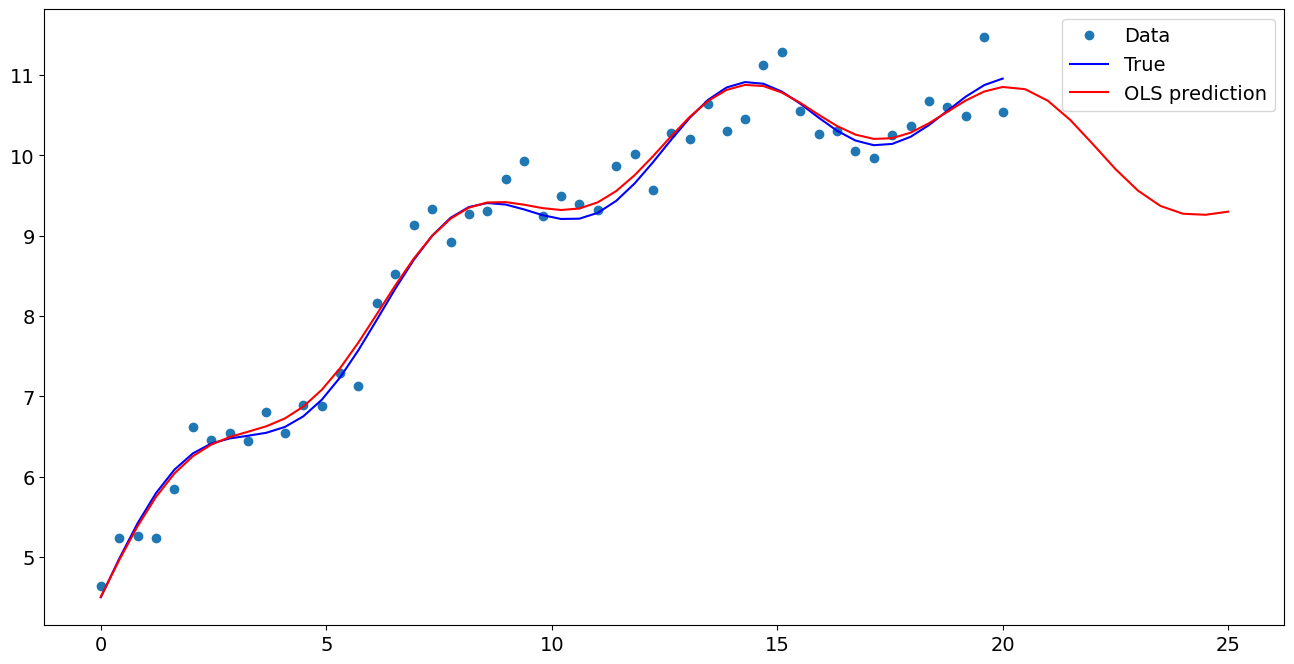

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.025830
x1                  0.505373
np.sin(x1)          0.426934
I((x1 - 5) ** 2)   -0.020760
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.824092
1    10.681432
2    10.440939
3    10.140765
4     9.831138
5     9.562054
6     9.371044
7     9.273983
8     9.261201
9     9.299852
dtype: float64